In [2]:
import pandas as pd
from datetime import timedelta
file_path = '/Users/zhiranbai/Downloads/整点报表处理数据_new.xlsx'  # Update this to your Excel file's path
df = pd.read_excel(file_path)




In [3]:
import pandas as pd

# Assuming df is your DataFrame

# Filter DataFrame for '混合模式' and non-null in both '冷冻水流量' and '冷却水流量'
filtered_df = df[
    (df['运行模式'] == '混合模式') &
    df['冷冻水流量'].notna() &
    df['冷却水流量'].notna() &
    df['冷冻水泵频率'].notna() &
    df['冷冻水泵功率'].notna() &
    df['冷却水泵频率'].notna() &
    df['冷却水泵功率'].notna()
]

# Initialize a dictionary to hold our results
results = {}

for _, row in filtered_df.iterrows():
    system_id = row['System Identifier']
    
    # Check if the system_id is not already in our results dictionary
    if system_id not in results:
        results[system_id] = {'X': [], 'Y': []}
    
    # Append the relevant values for X and Y
    results[system_id]['X'].append({
        '冷冻水泵频率': row['冷冻水泵频率'],
        '冷冻水泵功率': row['冷冻水泵功率'],
        '冷却水泵频率': row['冷却水泵频率'],
        '冷却水泵功率': row['冷却水泵功率'],
    })
    results[system_id]['Y'].append({
        '冷冻水流量': row['冷冻水流量'],
        '冷却水流量': row['冷却水流量'],
    })

# Now, `results` contains the X and Y values for each system identifier that meets your conditions.


In [4]:
results['3#系统']

{'X': [{'冷冻水泵频率': 37.0, '冷冻水泵功率': 66.6, '冷却水泵频率': 39.8, '冷却水泵功率': 82.2},
  {'冷冻水泵频率': 37.0, '冷冻水泵功率': 66.6, '冷却水泵频率': 39.8, '冷却水泵功率': 82.2},
  {'冷冻水泵频率': 36.9, '冷冻水泵功率': 66.7, '冷却水泵频率': 41.6, '冷却水泵功率': 82.0},
  {'冷冻水泵频率': 36.9, '冷冻水泵功率': 66.7, '冷却水泵频率': 41.6, '冷却水泵功率': 82.0},
  {'冷冻水泵频率': 36.9, '冷冻水泵功率': 66.7, '冷却水泵频率': 41.6, '冷却水泵功率': 82.0},
  {'冷冻水泵频率': 36.9, '冷冻水泵功率': 66.7, '冷却水泵频率': 41.6, '冷却水泵功率': 82.0},
  {'冷冻水泵频率': 36.9, '冷冻水泵功率': 66.7, '冷却水泵频率': 41.6, '冷却水泵功率': 82.0},
  {'冷冻水泵频率': 36.9, '冷冻水泵功率': 66.7, '冷却水泵频率': 41.6, '冷却水泵功率': 82.0},
  {'冷冻水泵频率': 36.9, '冷冻水泵功率': 66.7, '冷却水泵频率': 41.6, '冷却水泵功率': 82.0},
  {'冷冻水泵频率': 36.9, '冷冻水泵功率': 66.7, '冷却水泵频率': 41.6, '冷却水泵功率': 82.0},
  {'冷冻水泵频率': 36.9, '冷冻水泵功率': 66.7, '冷却水泵频率': 41.6, '冷却水泵功率': 82.0},
  {'冷冻水泵频率': 36.9, '冷冻水泵功率': 66.7, '冷却水泵频率': 41.6, '冷却水泵功率': 82.0},
  {'冷冻水泵频率': 36.9, '冷冻水泵功率': 66.7, '冷却水泵频率': 41.6, '冷却水泵功率': 82.0},
  {'冷冻水泵频率': 36.9, '冷冻水泵功率': 66.7, '冷却水泵频率': 41.6, '冷却水泵功率': 82.0},
  {'冷冻水泵频率': 36.9, '冷冻水泵功率': 66.7, '冷却水泵频率'

In [7]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import os



# Initialize lists for each system
X_1_system, Y1_1_system, Y2_1_system = [], [], []


# Example mapping function to decide which list to append to
def append_to_list( x_record, y_record):
    
        X_1_system.append(x_record)
        Y1_1_system.append(y_record['冷冻水流量'])
        Y2_1_system.append(y_record['冷却水流量'])
    

# Assuming 'results' is structured with 'X' and 'Y' lists under each system_id
for system_id, data in results.items():
    for x_record, y_record in zip(data['X'], data['Y']):
        x_values = [x_record['冷冻水泵频率'], x_record['冷冻水泵功率'], x_record['冷却水泵频率'], x_record['冷却水泵功率']]
        append_to_list(x_values, y_record)

# Convert lists to NumPy arrays
X_1_system_np, Y1_1_system_np, Y2_1_system_np = np.array(X_1_system), np.array(Y1_1_system), np.array(Y2_1_system)



In [8]:
X_1_system_np.shape,Y1_1_system_np.shape,Y2_1_system_np.shape #175,4
# X_2_system_np.shape,Y1_2_system_np.shape,Y2_2_system_np.shape#151
# X_3_system_np.shape,Y1_3_system_np.shape,Y2_3_system_np.shape#226
# X_4_system_np.shape,Y1_4_system_np.shape,Y2_4_system_np.shape#493

((926, 4), (926,), (926,))

In [12]:
# from sklearn.preprocessing import StandardScaler

# # Initialize scalers for X and Y
# scaler_X = StandardScaler()
# scaler_Y1 = StandardScaler()
# scaler_Y2 = StandardScaler()

# # Scale each X array
# X_1_system_np = scaler_X.fit_transform(X_1_system_np)
# # X_2_system_np = scaler_X.fit_transform(X_2_system_np)
# # X_3_system_np = scaler_X.fit_transform(X_3_system_np)
# # X_4_system_np = scaler_X.fit_transform(X_4_system_np)

# # Scale each Y1 array
# Y1_1_system_np = scaler_Y1.fit_transform(Y1_1_system_np.reshape(-1, 1))
# # Y1_2_system_np = scaler_Y1.fit_transform(Y1_2_system_np.reshape(-1, 1))
# # Y1_3_system_np = scaler_Y1.fit_transform(Y1_3_system_np.reshape(-1, 1))
# # Y1_4_system_np = scaler_Y1.fit_transform(Y1_4_system_np.reshape(-1, 1))

# # Scale each Y2 array
# Y2_1_system_np = scaler_Y2.fit_transform(Y2_1_system_np.reshape(-1, 1))
# # Y2_2_system_np = scaler_Y2.fit_transform(Y2_2_system_np.reshape(-1, 1))
# # Y2_3_system_np = scaler_Y2.fit_transform(Y2_3_system_np.reshape(-1, 1))
# # Y2_4_system_np = scaler_Y2.fit_transform(Y2_4_system_np.reshape(-1, 1))


In [9]:
# Split the data
X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split(
    X_1_system_np, Y1_1_system_np, Y2_1_system_np, test_size=0.2)#, random_state=42

X_train, X_val, Y1_train, Y1_val, Y2_train, Y2_val = train_test_split(
    X_train, Y1_train, Y2_train, test_size=0.25)  # 0.25 x 0.8 = 0.2

In [ ]:
X_train

In [10]:




# Custom callback for saving the best model
class SaveBestModel(xgb.callback.TrainingCallback):
    def __init__(self, save_path='/Users/zhiranbai/Downloads/best_model/', metric='validation_0-rmse', save_best_only=True):
        super().__init__()
        self.save_path = save_path
        self.metric = metric
        self.save_best_only = save_best_only
        self.best_score = None
        self.best_iteration = 0
        if not os.path.exists(save_path):
            os.makedirs(save_path)

    def after_iteration(self, model, epoch, evals_log):
        if 'rmse' not in evals_log['validation_0']:
            raise ValueError("Metric 'rmse' not found in evaluation logs for 'validation_0'.")
    
        current_score = evals_log['validation_0']['rmse'][-1]  # Access the last value directly
        if self.best_score is None or current_score < self.best_score:
            self.best_score = current_score
            self.best_iteration = epoch
            model.save_model(f"{self.save_path}best_model_{epoch}.json")
            print(f"Best model updated: iteration {epoch}, rmse: {current_score}")
        return False

# Model training and saving best models
def train_and_save_model(X_train, Y_train,X_val,Y_val, X_test, Y_test, save_path, metric='rmse'):
    dtrain = xgb.DMatrix(X_train, label=Y_train)
    dval=xgb.DMatrix(X_val, label=Y_val)
    dtest = xgb.DMatrix(X_test, label=Y_test)
    params = {
        'max_depth': 7,
        'eta': 0.01,
        'objective': 'reg:squarederror',
        'eval_metric': metric
    }
    bst = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'validation_0')],
                    early_stopping_rounds=10, verbose_eval=False,
                    callbacks=[SaveBestModel(save_path=save_path, metric=f'{metric}')])
    return bst

# Train models for both Y1 and Y2 targets
bst_Y1 = train_and_save_model(X_train[:,[0,1]], Y1_train,X_val[:,[0,1]],Y1_val, X_test[:,[0,1]], Y1_test, '/Users/zhiranbai/Downloads/best_model_Y1h/', 'rmse')
bst_Y2 = train_and_save_model(X_train[:,[2,3]], Y2_train,X_val[:,[2,3]],Y2_val, X_test[:,[2,3]], Y2_test, '/Users/zhiranbai/Downloads/best_model_Y2h/', 'rmse')

# Example evaluation step (mean squared error)
dtestY1 = xgb.DMatrix(X_test[:,[0,1]],)
dtestY2 = xgb.DMatrix(X_test[:,[2,3]],)
Y1_pred = bst_Y1.predict(dtestY1)
Y2_pred = bst_Y2.predict(dtestY2)

mse_Y1 = mean_squared_error(Y1_test, Y1_pred)
mse_Y2 = mean_squared_error(Y2_test, Y2_pred)

print(f"Mean Squared Error for Y1: {mse_Y1}")
print(f"Mean Squared Error for Y2: {mse_Y2}")

Best model updated: iteration 0, rmse: 192.3878232170034
Best model updated: iteration 1, rmse: 190.83296836279686
Best model updated: iteration 2, rmse: 189.2960921016297
Best model updated: iteration 3, rmse: 187.7770397546351
Best model updated: iteration 4, rmse: 186.2756472966595
Best model updated: iteration 5, rmse: 184.79176940062652
Best model updated: iteration 6, rmse: 183.32523896368573
Best model updated: iteration 7, rmse: 181.87590048783719
Best model updated: iteration 8, rmse: 180.44361534406036
Best model updated: iteration 9, rmse: 179.0282229364515
Best model updated: iteration 10, rmse: 177.62957119393462
Best model updated: iteration 11, rmse: 176.24751748435975
Best model updated: iteration 12, rmse: 174.8818927799989
Best model updated: iteration 13, rmse: 173.5325710496438
Best model updated: iteration 14, rmse: 172.22896445222852
Best model updated: iteration 15, rmse: 170.91450124919575
Best model updated: iteration 16, rmse: 169.6158407967196
Best model upda

Best model updated: iteration 148, rmse: 85.29325764712111
Best model updated: iteration 149, rmse: 84.97651469686316
Best model updated: iteration 150, rmse: 84.70976831532406
Best model updated: iteration 151, rmse: 84.45691455690725
Best model updated: iteration 152, rmse: 84.20844661573018
Best model updated: iteration 153, rmse: 83.94801771908904
Best model updated: iteration 154, rmse: 83.70491000419537
Best model updated: iteration 155, rmse: 83.45431702168645
Best model updated: iteration 156, rmse: 83.21466276177257
Best model updated: iteration 157, rmse: 82.96790337204045
Best model updated: iteration 158, rmse: 82.71976177442126
Best model updated: iteration 159, rmse: 82.47581685213467
Best model updated: iteration 160, rmse: 82.24851002617875
Best model updated: iteration 161, rmse: 82.01813858518233
Best model updated: iteration 162, rmse: 81.78410144951607
Best model updated: iteration 163, rmse: 81.55308462858103
Best model updated: iteration 164, rmse: 81.338049287216

Best model updated: iteration 289, rmse: 67.64250640502928
Best model updated: iteration 290, rmse: 67.57716430029612
Best model updated: iteration 291, rmse: 67.51561313227914
Best model updated: iteration 292, rmse: 67.4550671741748
Best model updated: iteration 293, rmse: 67.39534342838382
Best model updated: iteration 294, rmse: 67.33678803759328
Best model updated: iteration 295, rmse: 67.27911516204175
Best model updated: iteration 296, rmse: 67.21991083824385
Best model updated: iteration 297, rmse: 67.16416608895115
Best model updated: iteration 298, rmse: 67.10942715591695
Best model updated: iteration 299, rmse: 67.0555243677181
Best model updated: iteration 300, rmse: 66.95909680506676
Best model updated: iteration 301, rmse: 66.90686008966787
Best model updated: iteration 302, rmse: 66.8098993091619
Best model updated: iteration 303, rmse: 66.75929865641375
Best model updated: iteration 304, rmse: 66.66660052542443
Best model updated: iteration 305, rmse: 66.61756444981705


Best model updated: iteration 431, rmse: 59.93241115486418
Best model updated: iteration 432, rmse: 59.86150475418355
Best model updated: iteration 433, rmse: 59.85838767532288
Best model updated: iteration 434, rmse: 59.785670219568715
Best model updated: iteration 435, rmse: 59.713632096635095
Best model updated: iteration 436, rmse: 59.64226846650593
Best model updated: iteration 437, rmse: 59.63925153553639
Best model updated: iteration 438, rmse: 59.570936466901294
Best model updated: iteration 439, rmse: 59.50085765071121
Best model updated: iteration 440, rmse: 59.498019296638425
Best model updated: iteration 441, rmse: 59.428566057588164
Best model updated: iteration 442, rmse: 59.36216861022076
Best model updated: iteration 443, rmse: 59.35946783552515
Best model updated: iteration 444, rmse: 59.29128148348127
Best model updated: iteration 445, rmse: 59.22358180728534
Best model updated: iteration 446, rmse: 59.220985015439176
Best model updated: iteration 447, rmse: 59.148976

Best model updated: iteration 584, rmse: 54.658588449539344
Best model updated: iteration 585, rmse: 54.653790715425714
Best model updated: iteration 586, rmse: 54.631577226422046
Best model updated: iteration 587, rmse: 54.62681897016675
Best model updated: iteration 589, rmse: 54.60709194753752
Best model updated: iteration 590, rmse: 54.60241527762319
Best model updated: iteration 591, rmse: 54.580849965566024
Best model updated: iteration 592, rmse: 54.576232500558554
Best model updated: iteration 593, rmse: 54.554770142760255
Best model updated: iteration 594, rmse: 54.55023021555403
Best model updated: iteration 595, rmse: 54.54572393235348
Best model updated: iteration 596, rmse: 54.5247936775123
Best model updated: iteration 597, rmse: 54.52034475931789
Best model updated: iteration 599, rmse: 54.50223237498887
Best model updated: iteration 600, rmse: 54.497853884495484
Best model updated: iteration 601, rmse: 54.477322311852305
Best model updated: iteration 602, rmse: 54.47300

Best model updated: iteration 747, rmse: 53.70980980071016
Best model updated: iteration 748, rmse: 53.70416269110562
Best model updated: iteration 749, rmse: 53.69067179034157
Best model updated: iteration 750, rmse: 53.68507833410984
Best model updated: iteration 751, rmse: 53.67176071700039
Best model updated: iteration 752, rmse: 53.66620248953887
Best model updated: iteration 753, rmse: 53.653049607207606
Best model updated: iteration 754, rmse: 53.647550215318724
Best model updated: iteration 755, rmse: 53.63456377525598
Best model updated: iteration 757, rmse: 53.63143338340668
Best model updated: iteration 758, rmse: 53.618604070980176
Best model updated: iteration 759, rmse: 53.617210768977515
Best model updated: iteration 760, rmse: 53.61586060671928
Best model updated: iteration 761, rmse: 53.60308252826043
Best model updated: iteration 762, rmse: 53.59762662715964
Best model updated: iteration 763, rmse: 53.585162578712584
Best model updated: iteration 764, rmse: 53.5839373

Best model updated: iteration 94, rmse: 126.21986485657537
Best model updated: iteration 95, rmse: 125.60933003107968
Best model updated: iteration 96, rmse: 124.98592434371278
Best model updated: iteration 97, rmse: 124.39458125173756
Best model updated: iteration 98, rmse: 123.7958402425609
Best model updated: iteration 99, rmse: 123.22094424721207
Best model updated: iteration 100, rmse: 122.63799019930136
Best model updated: iteration 101, rmse: 122.08416362952794
Best model updated: iteration 102, rmse: 121.51941346671816
Best model updated: iteration 103, rmse: 120.96799707543889
Best model updated: iteration 104, rmse: 120.41987286482723
Best model updated: iteration 105, rmse: 119.88081106844047
Best model updated: iteration 106, rmse: 119.35584092826618
Best model updated: iteration 107, rmse: 118.83545308131157
Best model updated: iteration 108, rmse: 118.32389365487323
Best model updated: iteration 109, rmse: 117.81945734696971
Best model updated: iteration 110, rmse: 117.32

Best model updated: iteration 240, rmse: 94.51323426276974
Best model updated: iteration 241, rmse: 94.47256558995463
Best model updated: iteration 242, rmse: 94.45251405417397
Best model updated: iteration 243, rmse: 94.41364273175152
Best model updated: iteration 244, rmse: 94.37537316563878
Best model updated: iteration 245, rmse: 94.33832008874407
Best model updated: iteration 246, rmse: 94.30180843727771
Best model updated: iteration 247, rmse: 94.28596931530062
Best model updated: iteration 248, rmse: 94.25140029916258
Best model updated: iteration 249, rmse: 94.21779724237153
Best model updated: iteration 250, rmse: 94.18477248696101
Best model updated: iteration 251, rmse: 94.17168509608052
Best model updated: iteration 252, rmse: 94.14023675013804
Best model updated: iteration 253, rmse: 94.10925013968449
Best model updated: iteration 254, rmse: 94.07924448303274
Best model updated: iteration 255, rmse: 94.07037100346847
Best model updated: iteration 256, rmse: 94.059467469193

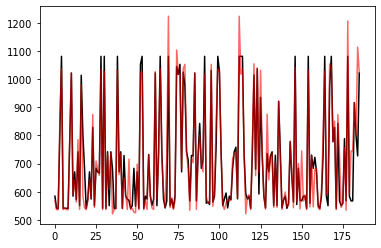

In [11]:
import matplotlib.pyplot as plt
def plot_predictions2(model, matix):
    #predictions = scaler_Y1.inverse_transform(model.predict(matix))
#     p_actuals= scaler_Y1.inverse_transform(matix.get_label())
    predictions=bst_Y1.predict(xgb.DMatrix(X_test[:,[0,1]],))
    p_actuals=Y1_test
    plt.plot(predictions,color='black')
    plt.plot(p_actuals,color='red',alpha=0.6)
    return 
plot_predictions2(bst_Y1, dtestY1)

In [12]:
predictions = bst_Y1.predict(dtestY1)
predictions

array([ 584.148  ,  540.78644,  540.78644,  802.33887, 1081.4451 ,
        540.78644,  541.5409 ,  540.78644,  540.78644,  777.74396,
       1022.2398 ,  584.148  ,  670.7356 ,  571.25037,  742.00287,
        550.2774 , 1014.0186 ,  802.33887,  683.19995,  540.78644,
        574.4693 ,  670.7356 ,  573.90796,  828.578  ,  550.2774 ,
        683.19995,  670.7356 ,  665.79297, 1081.4451 ,  540.78644,
       1081.4451 ,  540.78644,  742.00287,  550.2774 ,  742.00287,
        680.52924,  540.78644,  540.78644, 1081.4451 ,  670.7356 ,
        742.00287,  540.78644,  728.8313 ,  584.148  ,  573.90796,
        569.09216,  540.78644,  550.2774 ,  683.19995,  548.01917,
        670.7356 ,  540.78644, 1052.9819 , 1081.4451 ,  540.78644,
        584.148  ,  573.90796,  732.0607 ,  584.148  ,  551.77454,
        573.90796, 1022.2398 ,  550.2774 ,  742.00287, 1081.4451 ,
        742.00287,  574.4693 ,  542.26495,  567.3522 , 1081.4451 ,
        550.2774 ,  574.4693 ,  541.5409 ,  584.148  , 1045.33

In [14]:
def calculate_冷冻水流量(冷冻水泵频率, 冷冻水泵功率):
    value = bst_Y1.predict(xgb.DMatrix([[冷冻水泵频率,冷冻水泵功率]],))
    return value[0]

def calculate_冷却水流量(冷却水泵频率, 冷却水泵功率):
    value = bst_Y2.predict(xgb.DMatrix([[冷却水泵频率, 冷却水泵功率]],))
    return value[0]
# Assuming df is your DataFrame
# Define your conditions
condition = (
    (df['运行模式'] == '混合模式') &
    (df['冷机功率'] != 0) &
    df['冷冻水泵频率'].notna() &
    df['冷冻水泵功率'].notna() &
    df['冷冻水流量'].isna()   &
    df['冷却水泵频率'].notna() &
    df['冷却水泵功率'].notna() &
    df['冷却水流量'].isna()
)

# Apply your custom calculation function only to rows that meet the condition
# Note: axis=1 specifies that the function should be applied to each row, not each column
df.loc[condition, '冷冻水流量'] = df[condition].apply(lambda row: calculate_冷冻水流量(row['冷冻水泵频率'], row['冷冻水泵功率']), axis=1)
df.loc[condition, '冷却水流量'] = df[condition].apply(lambda row: calculate_冷却水流量(row['冷却水泵频率'], row['冷却水泵功率']), axis=1)
output_path = '/Users/zhiranbai/Downloads/补充混合水流量.xlsx'  # Update this to your desired output path
df.to_excel(output_path, index=False)